In [ ]:
# Business Sales Performance Analytics

#This analysis looks at sales data from a retail business to understand how sales and profit are performing over time, which products and categories bring in the most value, and which regions perform better or worse.



In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv(r"C:\Users\User\task 1\Sample - Superstore.csv.zip", encoding="latin1")

# First look at the data
df.head()

#I first loaded the dataset and checked the first few rows to understand what kind of information is available.



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
#This step helps confirm data types and shows that sales and profit values are already numeric, while dates need proper formatting.
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
#Date columns were converted to datetime format to allow trend analysis.Additional columns like Year, Month, and Profit Margin were created to support business-focused insights.

# Converting date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Creating time-based columns for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')

# Profit margin helps understand real performance
df['Profit Margin'] = df['Profit'] / df['Sales']

df[['Order Date', 'Year', 'Month', 'Profit Margin']].head()


,Order Date,Year,Month,Profit Margin
0,2016-11-08,2016,2016-11,0.1600
1,2016-11-08,2016,2016-11,0.3000
2,2016-06-12,2016,2016-06,0.4700
3,2015-10-11,2015,2015-10,-0.4000
4,2015-10-11,2015,2015-10,0.1125


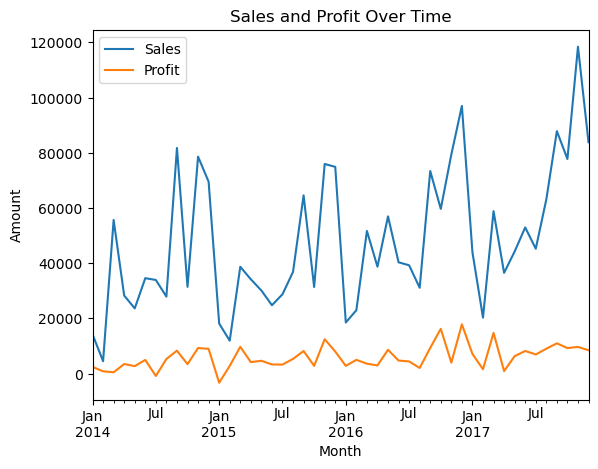

In [10]:
#Sales generally increase over time, but profit does not grow as smoothly.There are periods where sales rise while profit drops, which may be due to discounts or higher operating costs.

monthly_sales = df.groupby('Month')[['Sales', 'Profit']].sum()

monthly_sales.plot()
plt.title("Sales and Profit Over Time")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()


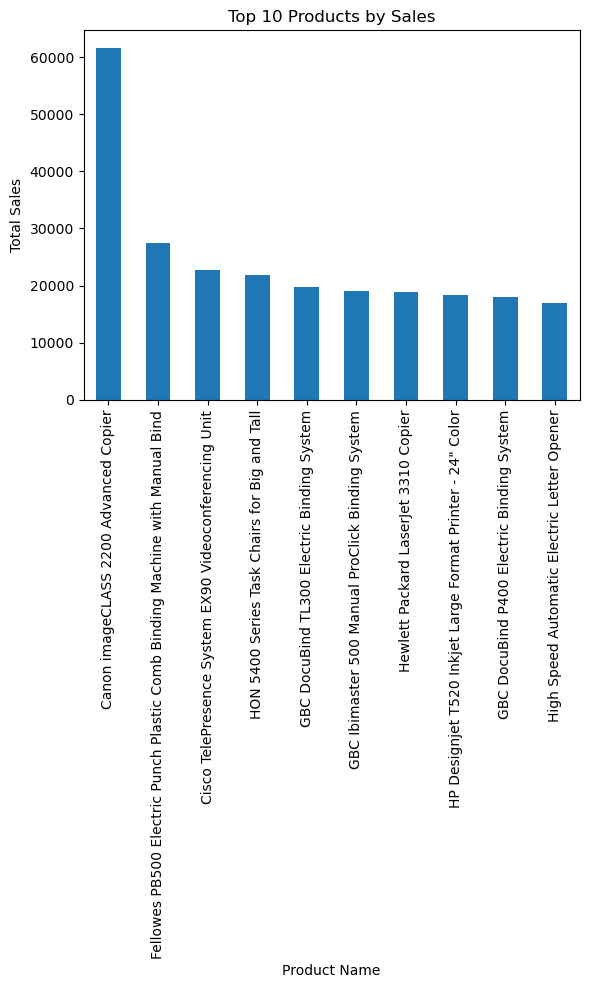

In [11]:
#A small number of products contribute a large portion of total sales.This suggests that the business relies heavily on a limited set of high-performing products.

top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.show()


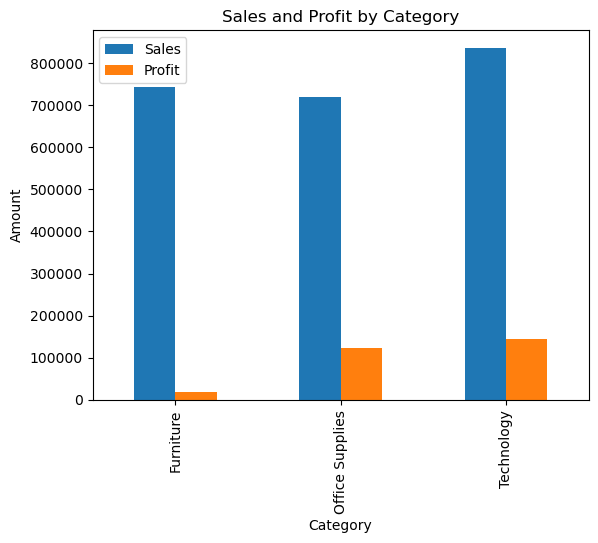

In [12]:
#Some categories generate strong sales but lower profit.This could indicate higher costs or aggressive discounting within those categories.

category_performance = df.groupby('Category')[['Sales', 'Profit']].sum()

category_performance.plot(kind='bar')
plt.title("Sales and Profit by Category")
plt.ylabel("Amount")
plt.show()

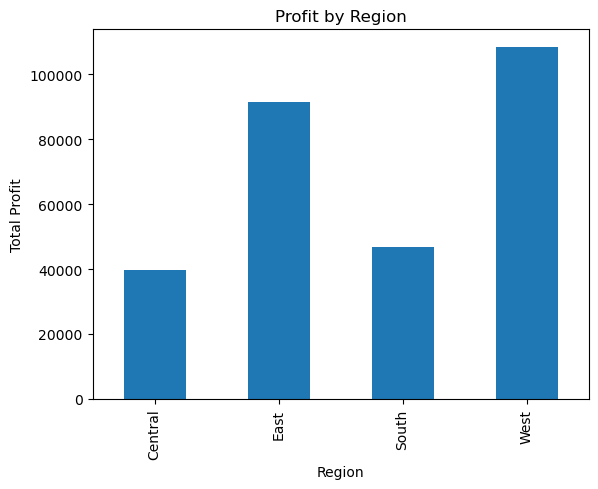

In [13]:
#Profit varies significantly across regions.Certain regions consistently perform better, while others may require a review of pricing or operational strategy.

region_profit = df.groupby('Region')['Profit'].sum()

region_profit.plot(kind='bar')
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.show()


In [14]:
#These key metrics provide a quick overview of overall business performance and highlight the strongest category and region.

print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Average Profit Margin:", df['Profit Margin'].mean())
print("Best Category:", df.groupby('Category')['Profit'].sum().idxmax())
print("Best Region:", df.groupby('Region')['Profit'].sum().idxmax())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Profit Margin: 0.12031392972104459
Best Category: Technology
Best Region: West


In [ ]:
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Average Profit Margin:", df['Profit Margin'].mean())
print("Best Category:", df.groupby('Category')['Profit'].sum().idxmax())
print("Best Region:", df.groupby('Region')['Profit'].sum().idxmax())

In [15]:
## Key Insights: A small group of products generates most of the revenue.
#Sales increase over time, but profit does not always follow the same pattern.
# Some categories sell well but have weaker profitability.
#Regional performance differs noticeably across the business.

## Recommendations: Focus marketing and inventory efforts on high-profit products.
# Review discount strategies in low-profit categories.
#Investigate underperforming regions to reduce losses.
#Prioritize improving existing strong products instead of expanding blindly.
